Import required libraries

In [118]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter 

frequency = 'M'


In [119]:
def clean(df):
  df = df.reset_index()
  df.index = df['time']
  df.index = pd.to_datetime(df.index)
  maximums = df.resample(frequency).max()
  minimums = df.resample(frequency).min()
  return pd.concat([maximums, minimums])

def read_and_clean(file_path):
  df = pd.read_csv(file_path, parse_dates=True)
  return clean(df)


read_and_clean('data/Stockholm.csv')

,index,time,temperature,snowfall,city
time,,,,,
2022-01-31,743,2022-01-31T23:00,7.3,1.54,Stockholm
2022-02-28,1415,2022-02-28T23:00,5.6,1.47,Stockholm
2022-03-31,2159,2022-03-31T23:00,13.1,0.28,Stockholm
2022-04-30,2879,2022-04-30T23:00,15.1,0.42,Stockholm
2022-05-31,3623,2022-05-31T23:00,20.1,0.00,Stockholm
2022-06-30,4343,2022-06-30T23:00,25.8,0.00,Stockholm
2022-07-31,5087,2022-07-31T23:00,27.8,0.00,Stockholm
2022-08-31,5831,2022-08-31T23:00,26.8,0.00,Stockholm
2022-09-30,6551,2022-09-30T23:00,18.9,0.00,Stockholm


In [122]:
file_paths = ['data/Stockholm.csv', 'data/London.csv', 'data/Durban.csv', 'data/Oslo.csv', 'data/Cape Town.csv'	]
df_list = [read_and_clean(file_path) for file_path in file_paths]
df = pd.concat(df_list)
df = df.reset_index(drop=True)
df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.strftime('%Y-%m')
df

,index,time,temperature,snowfall,city,date
0,743,2022-01-31 23:00:00,7.3,1.54,Stockholm,2022-01
1,1415,2022-02-28 23:00:00,5.6,1.47,Stockholm,2022-02
2,2159,2022-03-31 23:00:00,13.1,0.28,Stockholm,2022-03
3,2879,2022-04-30 23:00:00,15.1,0.42,Stockholm,2022-04
4,3623,2022-05-31 23:00:00,20.1,0.00,Stockholm,2022-05
...,...,...,...,...,...,...
115,5088,2022-08-01 00:00:00,7.3,0.00,Cape Town,2022-08
116,5832,2022-09-01 00:00:00,9.0,0.00,Cape Town,2022-09
117,6552,2022-10-01 00:00:00,12.2,0.00,Cape Town,2022-10
118,7296,2022-11-01 00:00:00,13.4,0.00,Cape Town,2022-11


Set the time column as the index  and convert to datetime, then resample the data for daily frequency

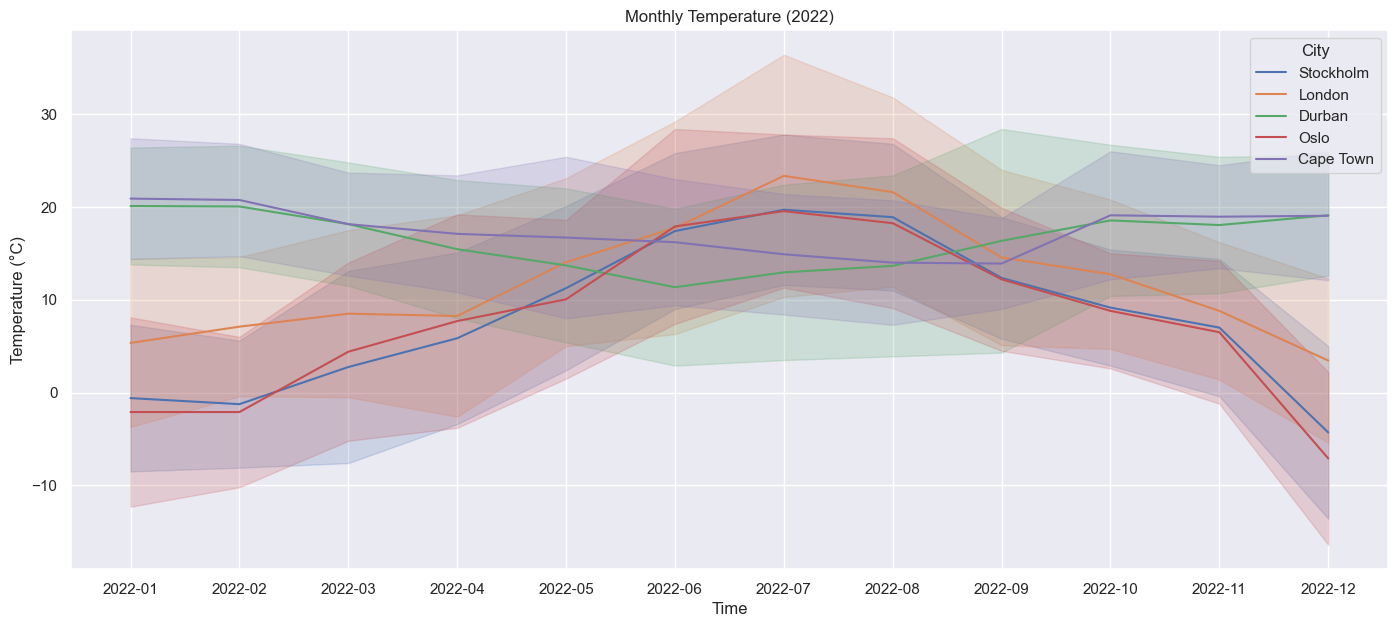

In [126]:


plt.figure(figsize=(17, 7))

# Set the style of the plot
sns.set_theme()

sns.lineplot(
    data=df, 
    hue="city", 
    x="date", 
    y="temperature"
)

# Add axis labels and a title
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend().set_title("City")

# Show the plot
plt.title("Monthly Temperature (2022)")
plt.show()
